<a href="https://colab.research.google.com/github/JeanPiere22121212/JeanPiere22121212/blob/main/ExamenFinal_Requena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import plotly.express as px
import seaborn as sns                
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as SGB
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [29]:
def analisis(datadf,columna):
  quality_list = list(pd.unique(datadf[columna]))
  list_elements = []
  for i in quality_list:
      _elements= len(datadf.loc[datadf[columna]==i]) 
      list_elements.append(_elements)

  x = np.arange(len(list_elements)) 
  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.countplot(x = columna,data = datadf)
  plt.title('Numero de datos de cada clase')
  plt.tight_layout()
  plt.show()


## Establezca 2 modelos de clasificación para el data Iirs

In [130]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# print(np.shape(X))
# print(np.shape(y))

escaler = StandardScaler()
X = escaler.fit_transform(X)
MaxScaler = MMS()
X = MaxScaler.fit_transform(X)

X = PCA(n_components=2).fit_transform(iris.data)

fig2 = px.scatter(x=X[:,0], y=X[:,1], color=y, labels={'x':'Componente Principal I','y':'Componente Principal II'})
fig2.show()

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.2,random_state=42)


#### Modelo SGB

In [145]:
ModeloSGB = SGB(n_estimators=11,max_depth = 3,random_state=42).fit(Xtrain, ytrain)

ypredtest = ModeloSGB.predict(Xtest)
ypredtrain = ModeloSGB.predict(Xtrain)
scoretrain = ModeloSGB.score(Xtrain, ytrain)
scoretest = ModeloSGB.score(Xtest, ytest)
print(f'El score train es: {round(scoretrain*100,3)}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

El score train es: 98.333%
El score test es: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



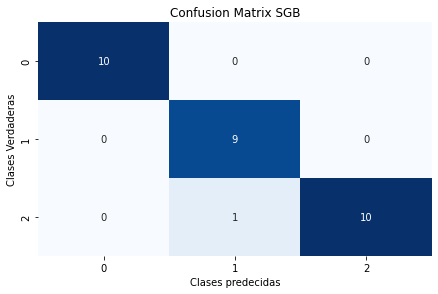

In [128]:
_matrix = confusion_matrix(ytest,ypredtest)
dataframe = pd.DataFrame(_matrix)

fig = sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title(f"Confusion Matrix SGB")
plt.tight_layout()
plt.ylabel("Clases Verdaderas")
plt.xlabel("Clases predecidas")
plt.show()

#### Modelo RFC

In [143]:
ModeloRFC = RFC(n_estimators=11,max_depth = 7,random_state=42).fit(Xtrain, ytrain)

ypredtest = ModeloRFC.predict(Xtest)
ypredtrain = ModeloRFC.predict(Xtrain)
scoretrain = ModeloRFC.score(Xtrain, ytrain)
scoretest = ModeloRFC.score(Xtest, ytest)
print(f'El score train es: {round(scoretrain*100,3)}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

El score train es: 100.0%
El score test es: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



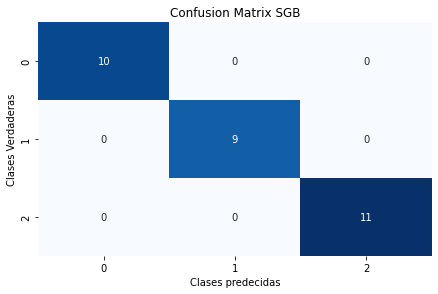

In [144]:
_matrix = confusion_matrix(ytest,ypredtest)
dataframe = pd.DataFrame(_matrix)

fig = sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title(f"Confusion Matrix SGB")
plt.tight_layout()
plt.ylabel("Clases Verdaderas")
plt.xlabel("Clases predecidas")
plt.show()

## Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses

In [43]:
ruta = 'https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv'
melbo_df = pd.read_csv(ruta)
melbo_df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


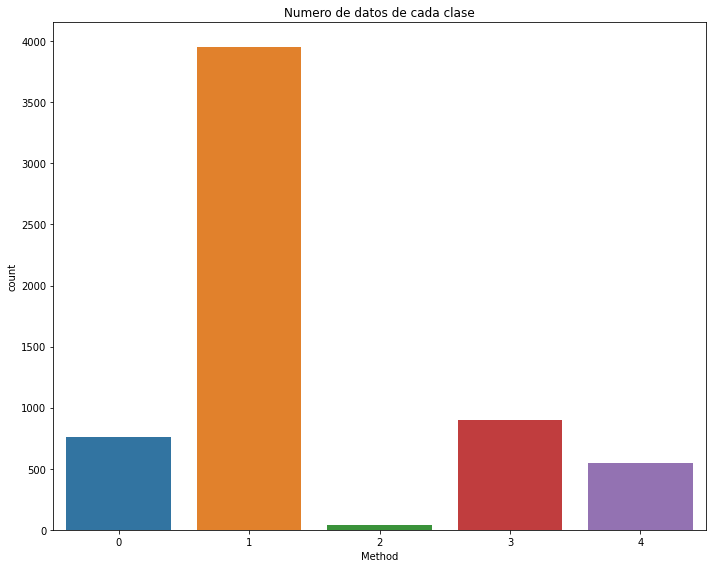

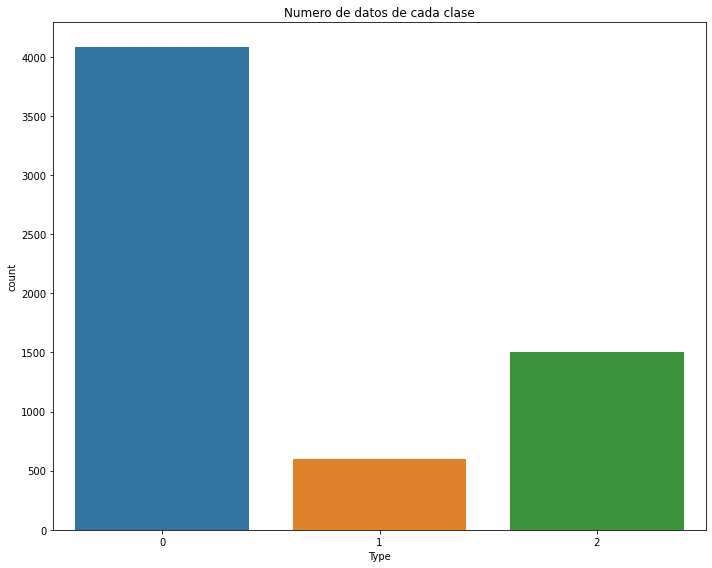

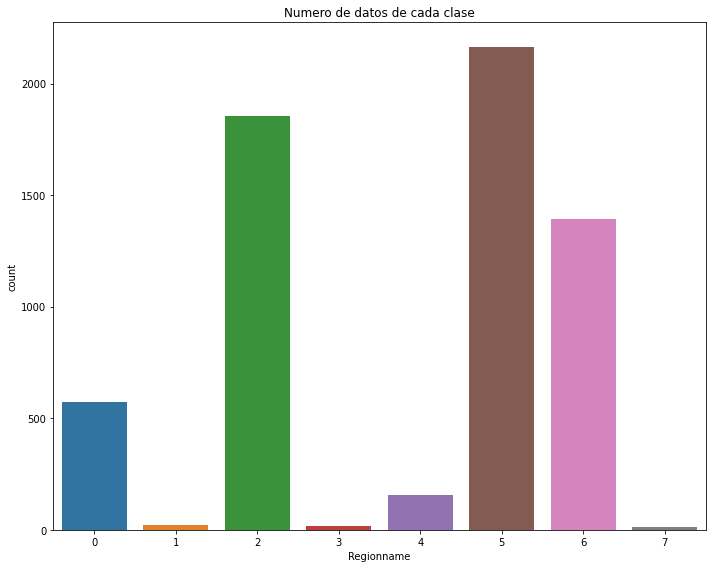

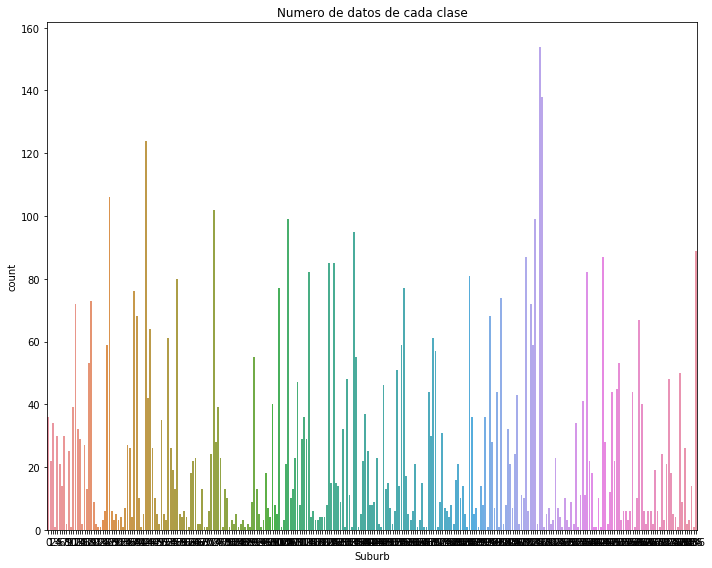

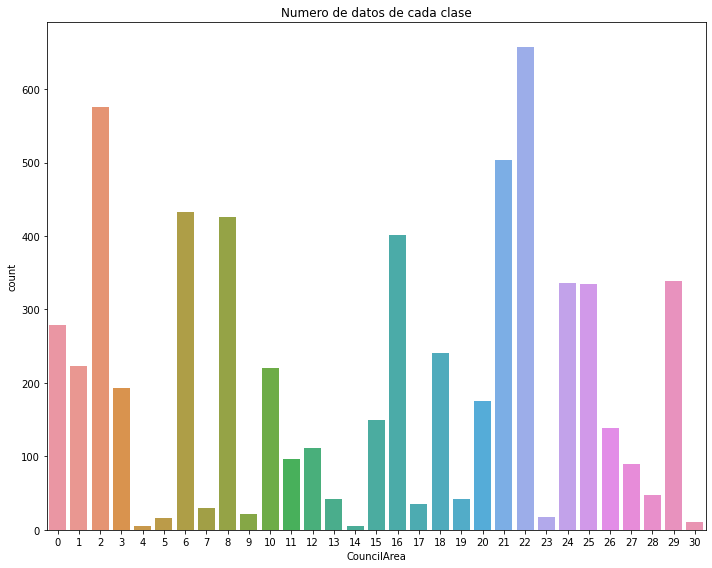

In [44]:

melbo_df = melbo_df.dropna()
label_quality = LabelEncoder()

melbo_df = melbo_df.drop(columns=['Address','SellerG','Date'])

for i in ['Method','Type','Regionname','Suburb','CouncilArea']:
  melbo_df[i] = label_quality.fit_transform(melbo_df[i])
  melbo_df[i].value_counts()
  analisis(melbo_df,i)

X = melbo_df.drop(columns='Price')
y = melbo_df['Price']

In [ ]:
# X

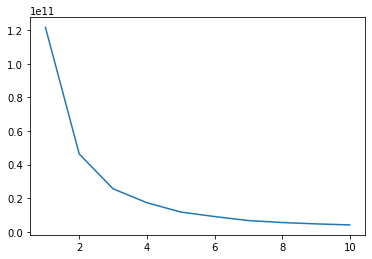

In [45]:
##Para arreglar lo desvalanceado de los datos usaremos kMeans para balancearla


inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X)
  inercia.append(k_means.inertia_)

plt.plot(range(1,11),inercia)



In [46]:
k_means2 = KMeans(n_clusters = 3) 
k_means2.fit(X)
labels = k_means2.labels_

In [47]:
escaler = StandardScaler()
X = escaler.fit_transform(X)
MaxScaler = MMS()
X = MaxScaler.fit_transform(X)

### Sin PCA

#### GradientBoostingRegressor

In [27]:
from sklearn.model_selection import ParameterGrid
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=42)

In [28]:
param_grid =  ParameterGrid({'n_estimators': np.arange(1,30,3),
                'loss': ['squared_error','absolute_error'],                      ########  PARAMETROS DEL SGB
                'criterion'   : ['friedman_mse','squared_error'],
                'max_depth'   : [None, 3, 5,7],
                'learning_rate':[0.01,0.001]
                })

resultados = {'params': [], 'r2test': [],'r2train':[]}
print('Cargando............')

for params in param_grid:
      modelo = GradientBoostingRegressor(
              random_state = 42,
              ** params
              )
      
      modelo.fit(Xtrain, ytrain)
      
      resultados['params'].append(params)
      resultados['r2test'].append(modelo.score(Xtest,ytest))        ### ".score" siver para saber la precision del modelo.
      resultados['r2train'].append(modelo.score(Xtrain,ytrain))
      """Para inprimir modelo por modelo 
      >>> print(f"[Modelo: {params}]")
      """
print('Imprimiendo los resultados')
resultados = pd.DataFrame(resultados)  #Convertimos los resultados en un data y procedemos a ordenar el score de mayor a menor.
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('r2test', ascending=False)
display(resultados.head(10))

Cargando............
Imprimiendo los resultados


,r2test,r2train,criterion,learning_rate,loss,max_depth,n_estimators
9,0.345447,0.430397,friedman_mse,0.01,squared_error,NaN,28
169,0.343151,0.430397,squared_error,0.01,squared_error,NaN,28
199,0.329410,0.354428,squared_error,0.01,squared_error,7.0,28
39,0.329406,0.354428,friedman_mse,0.01,squared_error,7.0,28
8,0.318436,0.394993,friedman_mse,0.01,squared_error,NaN,25
168,0.316718,0.394993,squared_error,0.01,squared_error,NaN,25
189,0.306630,0.307622,squared_error,0.01,squared_error,5.0,28
29,0.306630,0.307622,friedman_mse,0.01,squared_error,5.0,28
38,0.302819,0.323370,friedman_mse,0.01,squared_error,7.0,25
198,0.302703,0.323370,squared_error,0.01,squared_error,7.0,25


In [22]:
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=42)

modelo_GBR = GradientBoostingRegressor(n_estimators=28,max_depth = None,loss = 'squared_error',criterion ='friedman_mse',learning_rate=0.01 ,random_state=42).fit(Xtrain, ytrain)

ypredtest = modelo_GBR.predict(Xtest)
ypredtrain = modelo_GBR.predict(Xtrain)

r2train = r2_score(ytrain,ypredtrain)
r2test = r2_score(ytest,ypredtest)
print(r2test)
print(r2train)
print(((r2train-r2test)/r2train)*100)

0.3423119803874537
0.43039731199916675
20.466050589991507


### Con PCA

In [48]:
#Aplicamos PCA.
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
X = pca.transform(X)

fig2 = px.scatter(x=X[:,0], y=X[:,1], color=labels, labels={'x':'Componente Principal I','y':'Componente Principal II'})
fig2.show()

In [49]:

Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=42)

In [50]:
param_grid =  ParameterGrid({'n_estimators': np.arange(1,30,3),
                'loss': ['squared_error','absolute_error'],                      ########  PARAMETROS DEL SGB
                'criterion'   : ['friedman_mse','squared_error'],
                'max_depth'   : [None, 3, 5,7],
                'learning_rate':[0.01,0.001]
                })

resultados = {'params': [], 'r2test': [],'r2train':[]}
print('Cargando............')

for params in param_grid:
      modelo = GradientBoostingRegressor(
              random_state = 42,
              ** params
              )
      
      modelo.fit(Xtrain, ytrain)
      
      resultados['params'].append(params)
      resultados['r2test'].append(modelo.score(Xtest,ytest))        ### ".score" siver para saber la precision del modelo.
      resultados['r2train'].append(modelo.score(Xtrain,ytrain))
      """Para inprimir modelo por modelo 
      >>> print(f"[Modelo: {params}]")
      """
print('Imprimiendo los resultados')
resultados = pd.DataFrame(resultados)  #Convertimos los resultados en un data y procedemos a ordenar el score de mayor a menor.
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('r2test', ascending=False)
display(resultados.head(10))

Cargando............
Imprimiendo los resultados


,r2test,r2train,criterion,learning_rate,loss,max_depth,n_estimators
199,0.174196,0.212724,squared_error,0.01,squared_error,7.0,28
39,0.174196,0.212724,friedman_mse,0.01,squared_error,7.0,28
29,0.170123,0.166374,friedman_mse,0.01,squared_error,5.0,28
189,0.170123,0.166374,squared_error,0.01,squared_error,5.0,28
9,0.166184,0.430397,friedman_mse,0.01,squared_error,NaN,28
169,0.165926,0.430397,squared_error,0.01,squared_error,NaN,28
179,0.161176,0.142911,squared_error,0.01,squared_error,3.0,28
19,0.161176,0.142911,friedman_mse,0.01,squared_error,3.0,28
198,0.159988,0.194662,squared_error,0.01,squared_error,7.0,25
38,0.159988,0.194662,friedman_mse,0.01,squared_error,7.0,25


In [51]:
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=42)

modelo_GBR = GradientBoostingRegressor(n_estimators=28,max_depth = 7,loss = 'squared_error',criterion ='squared_error',learning_rate=0.01 ,random_state=42).fit(Xtrain, ytrain)

ypredtest = modelo_GBR.predict(Xtest)
ypredtrain = modelo_GBR.predict(Xtrain)

r2train = r2_score(ytrain,ypredtrain)
r2test = r2_score(ytest,ypredtest)
print(r2test)
print(r2train)
print(((r2train-r2test)/r2train)*100)

0.1741957629948483
0.21272396250721315
18.111828615010133


### Resultado

<p> El modelo que fue realizado sin el PCA resulto más generalizado. Cabe aclarar que el modelo puede ser mejorado</p>

## ¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 

In [61]:
ruta ='/content/wine.xlsx'
wine_df = pd.read_excel(ruta)
wine_df =wine_df.drop(columns=['Unnamed: 0','description','winery','region_2','designation'])
wine_df

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend
...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend
150926,France,91,27.0,Champagne,Champagne,Champagne Blend
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend
150928,France,90,52.0,Champagne,Champagne,Champagne Blend


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



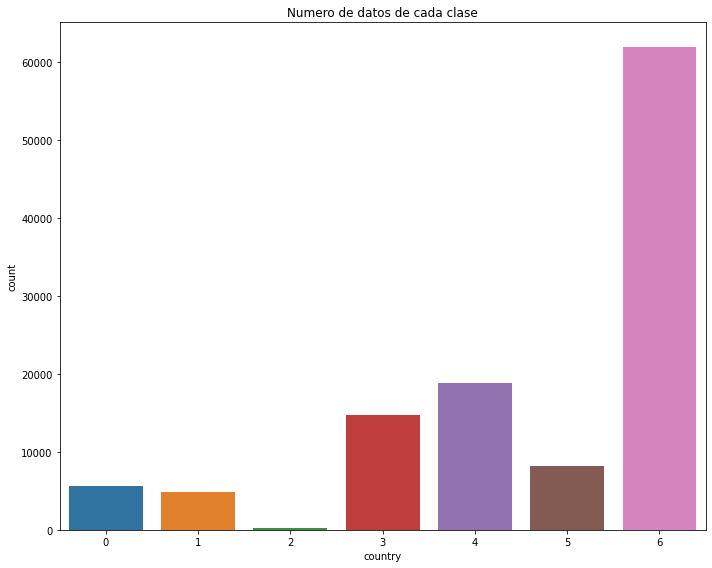

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



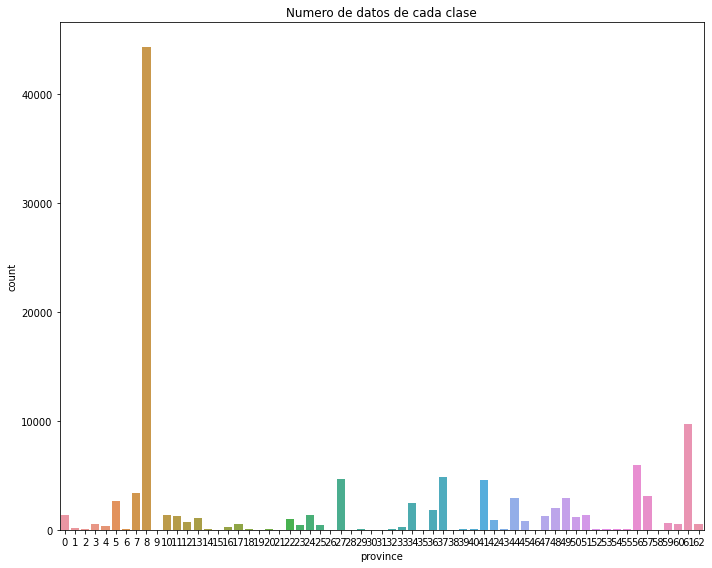

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



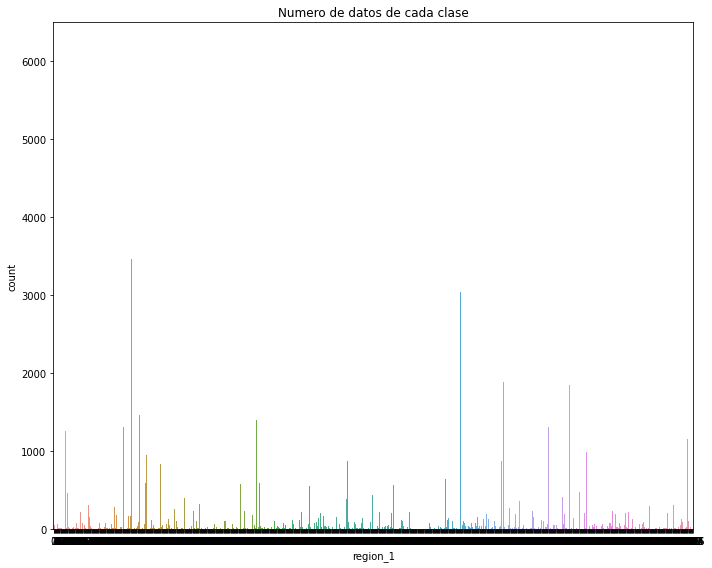

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



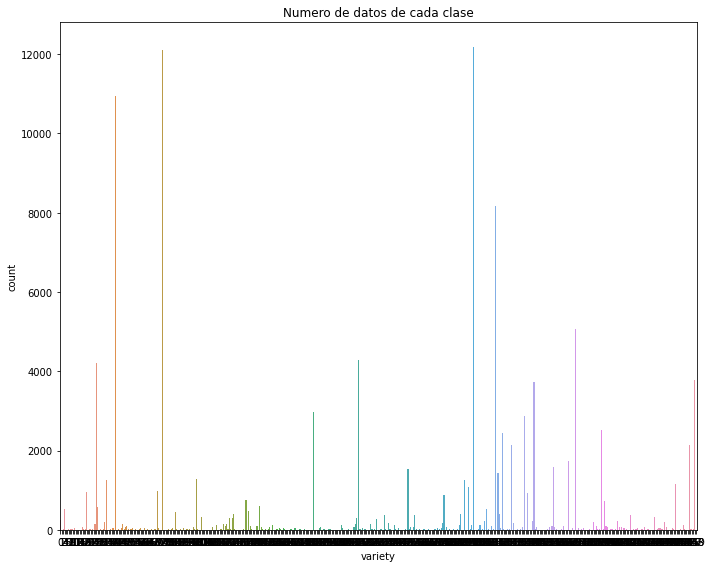

In [62]:
wine_df = wine_df.dropna()
label_quality = LabelEncoder()
for i in ['country','province','region_1','variety']:
  wine_df[i] = label_quality.fit_transform(wine_df[i])
  wine_df[i].value_counts()
  analisis(wine_df,i)

X = np.array(wine_df.drop(columns='price'))
y = np.array(wine_df['price'])


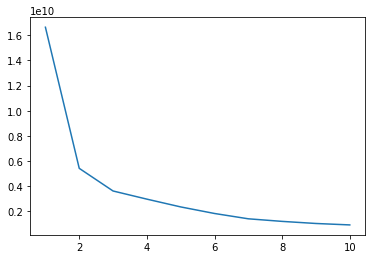

In [63]:
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X)
  inercia.append(k_means.inertia_)

plt.plot(range(1,11),inercia)


In [64]:
k_means2 = KMeans(n_clusters = 3) 
k_means2.fit(X)
labels = k_means2.labels_

In [65]:
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler
escaler = StandardScaler()
X = escaler.fit_transform(X)
MaxScaler = MMS()
X = MaxScaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

modeloRFC = RFC(n_estimators=200,random_state=42)
modeloRFC.fit(X_train, y_train)

ypred=modeloRFC(X_test)
####EL PROCESO DE MODULADO EXCEDE LA RAM DEL PROGRAMA.......

In [ ]:
ypredtest = ModeloSGB.predict(Xtest)
ypredtrain = ModeloSGB.predict(Xtrain)
scoretrain = ModeloSGB.score(Xtrain, ytrain)
scoretest = ModeloSGB.score(Xtest, ytest)
print(f'El score train es: {round(scoretrain*100,3)}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

## Puedes graficar un modelo de deep leraning para la dataset de breast-cancer

In [ ]:
ruta='https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv'
cancer_df=pd.read_csv(ruta)
cancer_df.drop(columns='id')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


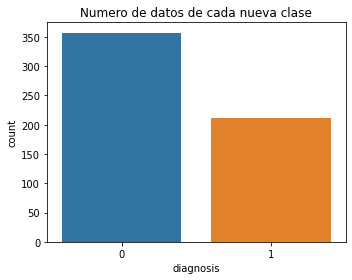

In [ ]:

label_quality = LabelEncoder() #Para poder cambiar de str a int.
cancer_df['diagnosis'] = label_quality.fit_transform(cancer_df['diagnosis'])
cancer_df['diagnosis'].value_counts() #Nuestros datos ahora quedan M = 0 , B = 1.

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x = 'diagnosis',data = cancer_df)
plt.title('Numero de datos de cada nueva clase')
plt.tight_layout()
plt.show()

In [ ]:
X = cancer_df.drop(columns='diagnosis')
y = cancer_df['diagnosis']

escaler = StandardScaler()
X = escaler.fit_transform(X)
MaxScaler = MMS()
X = MaxScaler.fit_transform(X)

## Crea una función que aplane la ruta de una imágen

In [ ]:


def planeImg():
  image=plt.imread(input('Ingrese Imagen: '))
  imgvector=image.flatten()
  print('El vector aplanado de la imagen ingresada es :',np.shape(imgvector))
planeImg()